# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [25]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data.sample()

,Age,Tardies
0,17,10


Draw a dispersion diagram (scatter plot) for the data.

<Axes: xlabel='Age', ylabel='Tardies'>

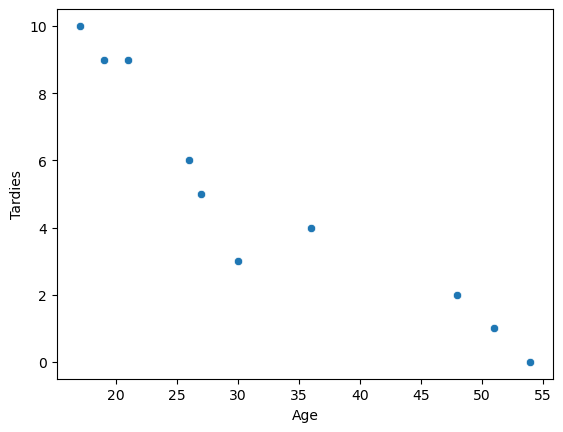

In [26]:
sns.scatterplot(x = "Age", y = "Tardies", data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [27]:
#There is a trend with negative tendency 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [28]:
student_data.cov().abs()
#Studies covariance

,Age,Tardies
Age,187.655556,45.566667
Tardies,45.566667,12.544444


In [29]:
student_data.corr().abs()
#Studies relationship between the two variables.

,Age,Tardies
Age,1.000000,0.939163
Tardies,0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [30]:
lr = LinearRegression()

In [31]:
X = student_data[["Age"]]
y = student_data.Tardies

lr.fit(X, y) 

LinearRegression()

In [32]:
lr.coef_

array([-0.24282077])

In [33]:
lr.intercept_

12.888803363135771

In [34]:
student_data["prediction_linear_reg"] = student_data.Age * lr.coef_[0] + lr.intercept_

Plot your regression model on your scatter plot.

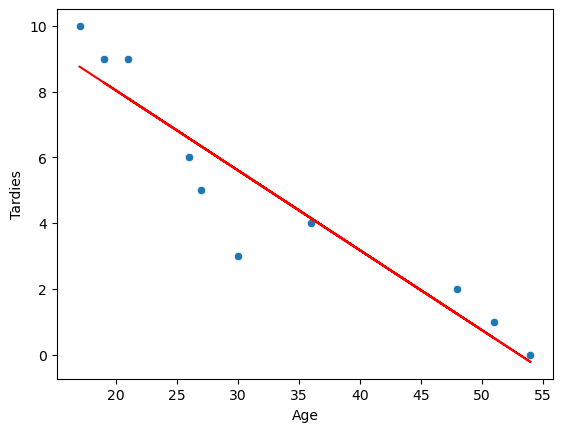

In [35]:
sns.scatterplot(x = "Age", y = "Tardies", data=student_data)
plt.plot(student_data.Age, student_data["prediction_linear_reg"], c="r")

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [36]:
result = smf.ols("Tardies ~ Age", data = student_data).fit()
result.summary()

C:\Users\polsa\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           5.57e-05
Time:                        17:47:16   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [40]:
v = pd.read_csv("vehicles.csv")
v.sample(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2463,BMW,740i/740i Sport,2000,4.4,8.0,Automatic 5-spd,Rear-Wheel Drive,Midsize Cars,Premium,18.311667,15,22,18,493.722222,2250
27723,Peugeot,505 Sedan,1989,2.2,4.0,Manual 5-spd,Rear-Wheel Drive,Compact Cars,Regular,18.311667,16,22,18,493.722222,1850


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [38]:
v["CO2_Emission_Grams_Mile"]. corr(v["Year"]) 

KeyError: 'CO2_Emission_Grams_Mile'

In [39]:
v["CO2_Emission_Grams_Mile"]. corr(v["Cylinders"]) 

KeyError: 'CO2_Emission_Grams_Mile'

In [ ]:
v["CO2_Emission_Grams_Mile"]. corr(v["Fuel_Barrels_Year"]) 

In [ ]:
v["CO2_Emission_Grams_Mile"]. corr(v["Combined_MPG"]) 

In [ ]:
v["CO2_Emission_Grams_Mile"]. corr(v["Fuel_Cost_Year"]) 

In [ ]:
v[["Year", "Cylinders", "Fuel_Barrels_Year", "Combined_MPG", "Fuel_Cost_Year","CO2_Emission_Grams_Mile"]].corr()

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
X = v[["Year", "Cylinders", "Fuel_Barrels_Year", "Combined_MPG", "Fuel_Cost_Year"]]
y = v["CO2_Emission_Grams_Mile"]

In [ ]:
results = smf.ols("CO2_Emission_Grams_Mile ~ Year + Cylinders + Fuel_Barrels_Year + Combined_MPG + Fuel_Cost_Year", data = v).fit()


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
results.summary()

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 